# Machine Learning

## Terminologi
- dataset
- features, misalnya dataset harga rumah. featuresnya adalah luas tanah, lokasi, dan jenis sertifikat. targetnya adalah harga rumah.
- model, saat kita sudah pilih algoritma ML, dan kita berikan data, dia sudah jadi model.

## Process
1. koleksi data
2. rapiin data
3. training model
4. evaluasi model
5. tuning - balik ke step 1-4 untuk membuat model lebih akurat

# Supervised vs Unsupervised Machine Learning

## Supervised
- diberi fitur dan target   
anggapnya seperti anak kecil yang diberi contoh soal dan cotoh jawabannya. setelah itu anak tersebut bisa menjawab soal2nya sesuai yang sudah dia pelajari dari contoh jawabannya.

### Dua jenis supervised machine learning:
1. Regression, target berbentuk angka, misal harga rumah
2. Classification, target berbentuk label, misalnya orang sakit/sehat


## Unsupervised
- diberi fitur saja
anggapnya seperti anak kecil diberi contoh soal saja. setelah itu anaknya akan bisa pisahin soalnya menurut jenis2.

1. Clustering
2. Dimensionality Reduction   
dan lainnya

# Linear Regression

diberikan fitur dan data target, kita mau memprediksi target dengan menggunakan garis regression.

In [67]:
# import package
import pandas as pd
import numpy as np

# untuk visualisasi
%matplotlib inline
import matplotlib.pyplot as plt

# untuk linear regression dan polynomial regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# ini untuk classification, logistic regression dan evaluasi keakuratan modelnya
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
[ 5 20 14 32 22 38]


Text(0.5, 1.0, 'fitur luas tanah, target harga rumah')

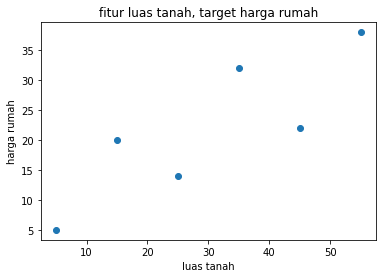

In [4]:
# siapin data

x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1)) # selalu 2D supaya model siap
y = np.array([5, 20, 14, 32, 22, 38])

# visualisasi datanya
print(x)
print(y)

plt.scatter(x,y)
plt.xlabel("luas tanah")
plt.ylabel("harga rumah")
plt.title("fitur luas tanah, target harga rumah")

In [5]:
# bikin model
model = LinearRegression()

# training model *sebenarnya kita perlu pisahkan data latihan dan ujian
model.fit(x, y)

LinearRegression()

Text(0.5, 1.0, 'fitur luas tanah, target harga rumah')

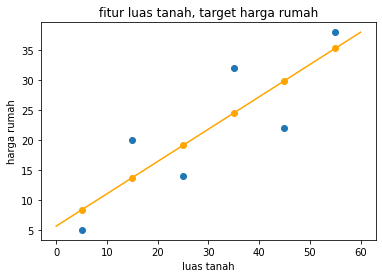

In [12]:
# bikin prediksi, untuk luas tanah 0-60
x_test = np.arange(0,61).reshape((-1,1))
y_pred = model.predict(x_test)

# bikin visualisasi
plt.plot(x_test, y_pred, color="orange")
plt.scatter(x, model.predict(x), color="orange")
plt.scatter(x,y)
plt.xlabel("luas tanah")
plt.ylabel("harga rumah")
plt.title("fitur luas tanah, target harga rumah")

In [14]:
# evaluasi tingkat keakuratan model
model.score(x, y)

0.7158756137479542

In [15]:
# tuning - nanti dulu

# Multiple Linear Regression

saat ada lebih dari 1 fitur, dan ada 1 target

In [20]:
# koleksi dan siapin data
x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11], [45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x, y = np.array(x), np.array(y)


In [22]:
# notes sedikit data asli biasa bentuknya begini
df = pd.DataFrame({"luas_tanah": x.T[0,:], 
                   "luas_bangunan": x.T[1,:],
                   "harga_rumah": y
                  })

df # jangan lupa pisahkan mana fitur, mana target

,luas_tanah,luas_bangunan,harga_rumah
0,0,1,4
1,5,1,5
2,15,2,20
3,25,5,14
4,35,11,32
5,45,15,22
6,55,34,38
7,60,35,43


In [23]:
# bikin dan trainig model
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [25]:
# evaluasi tingkat keakuratan model
model.score(x, y)

0.8615939258756776

In [26]:
df['prediksi'] = model.predict(x)
df

,luas_tanah,luas_bangunan,harga_rumah,prediksi
0,0,1,4,5.777605
1,5,1,5,8.012953
2,15,2,20,12.738675
3,25,5,14,17.974448
4,35,11,32,23.975297
5,45,15,22,29.466096
6,55,34,38,38.782276
7,60,35,43,41.272650


In [27]:
# jadi kalau tanah 30, bangunan 10, harga rumah berapa?

model.predict([[30, 10]])

array([21.48492356])

model ini memperkirakan harga rumahnya 21 saat luas tanah 30 dan luas bangunan 10

# Polynomial Regression
sama, regression, tapi kali ini garisnya bisa belok

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
[15 11  2  8 25 32]


Text(0, 0.5, 'harga rumah')

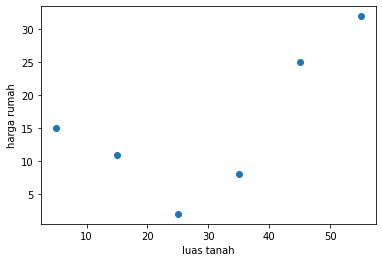

In [31]:
# siapin data
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([15, 11, 2, 8, 25, 32])
print(x)
print(y)

plt.scatter(x,y)
plt.xlabel("luas tanah")
plt.ylabel("harga rumah")

In [58]:
# ubah data jadi tipe polynomial
# bikin transformer
transformer = PolynomialFeatures(degree=2, include_bias=False)
# latih transformer
transformer.fit(x)

# ubah data kita jadi tipe polynomial dengan bantuan transformer
x_poly = transformer.transform(x)
print(x_poly)

[[   5.   25.]
 [  15.  225.]
 [  25.  625.]
 [  35. 1225.]
 [  45. 2025.]
 [  55. 3025.]]


In [36]:
# buat dan training model
model = LinearRegression()
model.fit(x_poly, y)

LinearRegression()

Text(0, 0.5, 'harga rumah')

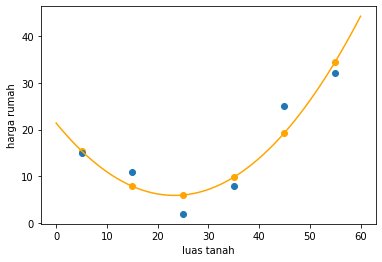

In [43]:
# bikin data x = 0 sampai 60
x_60 = np.arange(61).reshape(-1,1)
# bikin transformer
transformer = PolynomialFeatures(degree=2, include_bias=False)
# latih transformer
transformer.fit(x_60)

x_60_poly = transformer.transform(x_60)
y_pred = model.predict(x_60_poly)



# visualisasi


plt.plot(x_60, y_pred, color="orange")
plt.scatter(x, model.predict(x_poly), color="orange")

plt.scatter(x, y)
plt.xlabel("luas tanah")
plt.ylabel("harga rumah")

In [46]:
# evaluasi
model.score(x_poly, y)

0.8908516262498563

0.9996871368552784

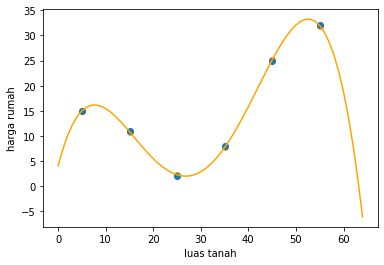

In [64]:
# tuning - misalnya kita coba kali ini polynomial regression nya degree 3

# bikin transformer
transformer = PolynomialFeatures(degree=4, include_bias=False)
# latih transformer
transformer.fit(x)

# ubah data kita jadi tipe polynomial dengan bantuan transformer
x_poly = transformer.transform(x)

# buat dan training model
model = LinearRegression()
model.fit(x_poly, y)

# data untuk visualisasi
# bikin data x = 0 sampai 60
x_60 = np.arange(65).reshape(-1,1)
# latih transformer
transformer.fit(x_60)

x_60_poly = transformer.transform(x_60)
y_pred = model.predict(x_60_poly)

# visualisasi
plt.plot(x_60, y_pred, color="orange")
plt.scatter(x, model.predict(x_poly), color="orange")

plt.scatter(x, y)
plt.xlabel("luas tanah")
plt.ylabel("harga rumah")

# evaluasi
model.score(x_poly, y)

In [66]:
# kalau luas tanah di 60, harga rumah berapa?
x_test = [[70]]
transformer.fit(x_test)
x_test_poly = transformer.transform(x_test)
model.predict(x_test_poly)

array([-77.41102431])

sepertinya ada yang salah dari modelnya karena sudah prediksi luas tanah 70, harga rumahnya -77

# Logistic Regression

In [92]:
# siapin data
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

pd.DataFrame({"level sakit dada": x.T[0], "0-sehat, 1-sakit": y})

,level sakit dada,"0-sehat, 1-sakit"
0,0,0
1,1,0
2,2,0
3,3,0
4,4,1
5,5,1
6,6,1
7,7,1
8,8,1
9,9,1


In [72]:
# buat model
model = LogisticRegression(solver='liblinear')
model.fit(x, y)

LogisticRegression(solver='liblinear')

In [73]:
# dummy data x 0-9
x_dummy = np.arange(10).reshape(-1,1)

y_pred = model.predict(x_dummy)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [76]:
# predict proba menunjukkan probabilitas dapat sebuah label
y_pred = model.predict_proba(x_dummy)
y_pred

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

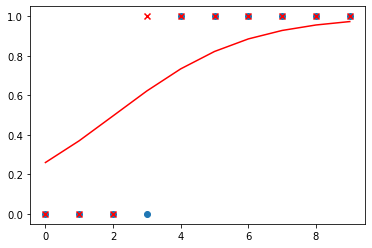

In [97]:
# visualisasi
plt.scatter(x, y)

plt.plot(x_dummy, y_pred.T[1], color="red")
plt.scatter(x_dummy, model.predict(x_dummy), color="red", marker="x")

In [94]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



In [95]:
print(confusion_matrix(y, model.predict(x)))

[[3 1]
 [0 6]]
